# **Image Classification (CIFAR10)**

### **1)MLP Model**
### **2)CNN Model**

# 0. Important necessary modules

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
import time
import numpy as np
import matplotlib.pyplot as plt

# 1.Data Preparation

The **CIFAR-10** dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. (https://www.cs.toronto.edu/~kriz/cifar.html)


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

**Data Set**  
$$X_{train} \in \mathcal{R}^{40000 \times 1024}, Y_{train} \in \mathcal{Z}^{40000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 1024}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 1024}, Y_{test} \in \mathcal{Z}^{10000}$$

### Data loading using dataloader

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

val_loader = torch.utils.data.DataLoader(valset, batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Inspecting dataset

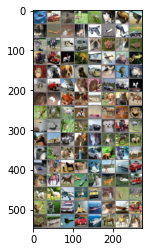

  car   car  deer  bird  frog   cat  bird plane   cat plane   cat  deer plane plane  deer   car  deer horse   cat truck   dog  frog   cat  bird truck truck horse  frog truck plane  deer  frog   dog horse   dog   dog truck   dog  bird  frog   cat truck plane   dog  frog   car truck horse  frog   cat  frog   cat  frog   dog   cat horse  bird  bird horse horse  ship horse   cat  frog plane  deer  frog  bird   car   dog truck  bird horse plane   car   cat   cat  frog  deer horse  bird  frog   dog  bird   car  deer   cat horse   car   cat horse horse  bird  bird  ship   car   dog horse horse plane   cat  deer  bird truck horse horse plane  deer   car horse  frog  deer  deer   dog   car   dog  ship  bird plane horse  frog  ship plane   car  ship horse  deer   cat
<class 'torch.Tensor'> torch.Size([128, 3, 32, 32])
<class 'torch.Tensor'> torch.Size([128]) tensor([1, 1, 4, 2, 6, 3, 2, 0, 3, 0, 3, 4, 0, 0, 4, 1, 4, 7, 3, 9, 5, 6, 3, 2,
        9, 9, 7, 6, 9, 0, 4, 6, 5, 7, 5, 5, 9, 5, 2, 6, 3, 

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

print(type(images), images.shape)
print(type(labels), labels.shape, labels)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Checking GPU

In [4]:
print(torch.cuda.is_available())
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

True


# 2. Model Define

### **MLP Model**

### **CNN Model**

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()


        self.conv1 = nn.Conv2d(in_channels = 3,        # depth 3 colors (r,b,g)
                               out_channels = 64,      # 64 activation maps
                               kernel_size = 3,        # 3 x 3
                               stride = 1,             # skipping
                               padding = 1 )           # keeping the same size 
        
        self.conv2 = nn.Conv2d(in_channels = 64,        # depth
                               out_channels = 256,      # 64 activation maps
                               kernel_size = 5,
                               stride = 1,
                               padding = 2)             # padding = kernel_size/2

        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.linear = nn.Linear(65536, 10)  # 50176 = 256 x 14 x 14 (after max pooling), 
                                            # 10 = 0~9 digits


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

# 3. Simulation Define

In [6]:
def experiment(args):
    #model = MLPModel(args.in_dim, args.out_dim, args.hid_dim, args.n_layers, args.dropout, args.use_bn, args.use_xavier)
    
    model = CNN()
    print(model)

    # GPU
    model.to(device)

    # ====== Loss function ====== #
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=0.9, weight_decay=1.0e-4)

    # ====== Data collection ====== #
    list_epoch = [] 
    list_train_loss = []
    list_val_loss = []
    list_acc = []
    list_acc_epoch = []

    # ====== Loop ====== #
    for epoch in range(args.epoch):  
        
        # ====== Train ====== #
        model.train() # Set the model be 'train mode' 

        train_loss = 0
        for input_X, true_y in train_loader:
            optimizer.zero_grad()

            # input_x = input_X.squeeze()
            # input_x = input_x.view(-1, 784) # 28x28 = 784

            input_X = input_X.to(device)
            true_y = true_y.to(device)

            pred_y = model(input_X)

            # loss = criterion(pred_y.squeeze(), true_y)
            loss = criterion(pred_y, true_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss = train_loss / len(train_loader)
        list_train_loss.append(train_loss)
        list_epoch.append(epoch)

 

        # ====== Validation ====== #
        model.eval() # Set the model be 'train mode' 
        val_loss = 0

        with torch.no_grad():
            for input_X, true_y in val_loader:

                # input_x = input_X.squeeze()
                # input_x = input_x.view(-1, 784) # 28x28 = 784

                input_X = input_X.to(device)
                true_y = true_y.to(device)

                pred_y = model(input_X)

                # loss = criterion(pred_y.squeeze(), true_y)
                loss = criterion(pred_y, true_y)

                val_loss += loss.item()

            val_loss = val_loss / len(val_loader)
            list_val_loss.append(val_loss)

        # ====== Evaluation ====== #
        model.eval() # Set the model be 'train mode' 
        correct = 0

        with torch.no_grad():
            for input_X, true_y in test_loader:

                # input_x = input_X.squeeze()
                # input_x = input_x.view(-1, 784) # 28x28 = 784

                input_X = input_X.to(device)
                true_y = true_y.to(device)

                pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
                correct += pred_y.eq(true_y).sum()

            acc = correct.item() / len(test_loader.dataset)
            list_acc.append(acc)
            list_acc_epoch.append(epoch)
 
        print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(epoch, train_loss, val_loss, acc*100))


    return list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch

In [ ]:
ts = time.time()

seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()

args = parser.parse_args("")

args.in_dim = 784
args.out_dim = 10
args.hid_dim = 200
args.n_layers = 5
args.act = 'relu'
args.dropout = 0.1
args.use_bn = True
args.use_xavier = True

args.lr = 0.005
args.epoch = 10

list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch = experiment(args)

te = time.time()

print('Elapsed time: {} sec'.format(int(te-ts)))

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=65536, out_features=10, bias=True)
)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0, Train Loss: 1.5463619670167137, Val Loss: 1.2908212640617467, Test Acc: 54.53%


# 5. Report

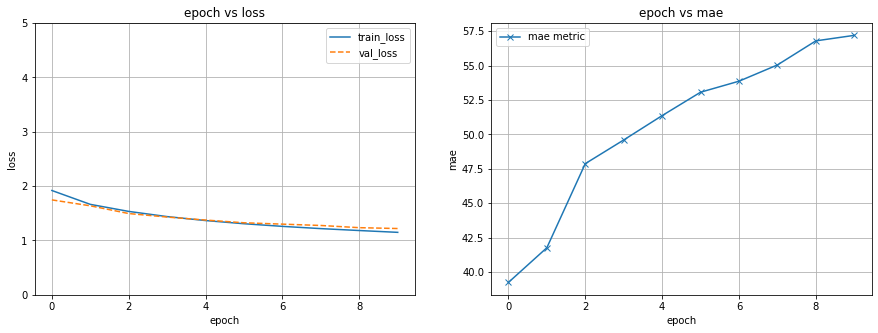

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()